<a href="https://colab.research.google.com/github/TheRealChichi/Deep-Learning-With-Python/blob/main/Reuters_Dataset_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the Reuters dataset

In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
train_labels[10]

3

# Preparing the Data

**Encoding the input data**

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Encoding the labels

In [7]:
def to_one_hot(labels, dimension = 46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [8]:
# We can use also built_in way to do this in Keras:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
model = keras.Sequential([
    layers.Dense(64, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(46, activation = "softmax"),
])

**Compiling the model**

In [11]:
model.compile(optimizer ="rmsprop",
              loss = "categorical_crossentropy",
              metrics = ['accuracy'])

**Setting aside a validation set**

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.3989 - loss: 3.0698 - val_accuracy: 0.6180 - val_loss: 1.7863
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.6497 - loss: 1.6103 - val_accuracy: 0.6750 - val_loss: 1.4224
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.7088 - loss: 1.2798 - val_accuracy: 0.7140 - val_loss: 1.2530
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.7723 - loss: 1.0345 - val_accuracy: 0.7480 - val_loss: 1.1327
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.8126 - loss: 0.8563 - val_accuracy: 0.7560 - val_loss: 1.0482
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.8374 - loss: 0.7431 - val_accuracy: 0.7940 - val_loss: 0.9754
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8717 - loss: 0.5930 - val_accuracy: 0.7930 - val_loss: 0.9483
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.8872 - loss: 0.5171 - val_accuracy: 0.7860 - 

In [14]:
# The model.fit() returns a History object, history is a member history that is a dictionnary containing the values.

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

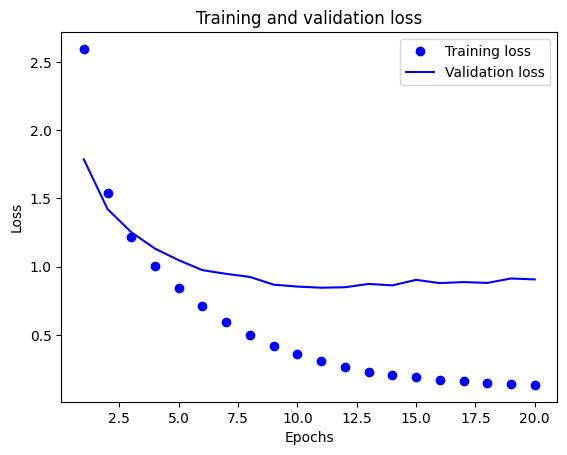

In [16]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label = "Training loss")
plt.plot(epochs, val_loss_values, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

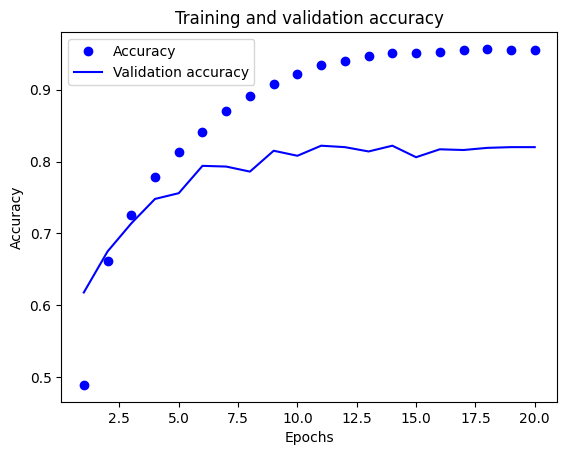

In [17]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label = "Accuracy")
plt.plot(epochs, val_acc, "b", label ="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [18]:
model = keras.Sequential([
    layers.Dense(64, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(46, activation = "softmax"),
])

model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

model.fit(x_train, y_train, epochs = 9, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.3731 - loss: 3.1804
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.6707 - loss: 1.5933
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.7397 - loss: 1.2070
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7888 - loss: 0.9589
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8334 - loss: 0.7879
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8601 - loss: 0.6509
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8856 - loss: 0.5381
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9074 - loss: 0.4408
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9170 - loss: 0.3837
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8028 - loss: 0.9024


In [19]:
results

[0.9122782945632935, 0.796972393989563]

In [20]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels == np.array(test_labels_copy))
hits_array.mean()

0.18210151380231523

**Generating Predictions on new data**

In [21]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [22]:
predictions[0].shape

(46,)

In [23]:
np.sum(predictions[0])

1.0

In [24]:
np.argmax(predictions[0])

3

**A model with an information bottleneck**

In [25]:
model = keras.Sequential([
    layers.Dense(64, activation = "relu"),
    layers.Dense(4, activation = "relu"),
    layers.Dense(46, activation = "softmax")
])

# The below two lines are adjusted for indentation
model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy", # Fixed potential syntax error with extra closing parenthesis
              metrics = ["accuracy"])

model.fit(partial_x_train,
          partial_y_train,
          epochs = 20,
          batch_size = 128,
          validation_data = (x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.1437 - loss: 3.4018 - val_accuracy: 0.3940 - val_loss: 2.4595
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4155 - loss: 2.2179 - val_accuracy: 0.5850 - val_loss: 1.7722
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6380 - loss: 1.5891 - val_accuracy: 0.6480 - val_loss: 1.5178
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6833 - loss: 1.3105 - val_accuracy: 0.6700 - val_loss: 1.4339
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7037 - loss: 1.2270 - val_accuracy: 0.6750 - val_loss: 1.4002
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7061 - loss: 1.1800 - val_accuracy: 0.6850 - val_loss: 1.3864
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7287 - loss: 1.0928 - val_accuracy: 0.6880 - val_loss: 1.4016
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7485 - loss: 1.0363 - val_accuracy: 0.6910 - v

In [26]:
results = model.evaluate(x_test, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6767 - loss: 1.8615


**Futher expirements**

In [27]:
#Trying to do with 32 units
model = keras.Sequential([
    layers.Dense(32, activation = "relu"),
    layers.Dense(4, activation = "relu"),
    layers.Dense(46, activation = "softmax")
])

model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

model.fit(partial_x_train,
          partial_y_train,
          epochs = 20,
          batch_size = 128,
          validation_data = (x_val, y_val))

results = model.evaluate(x_test, y_test)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.0808 - loss: 3.4771 - val_accuracy: 0.4700 - val_loss: 2.5110
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5458 - loss: 2.2373 - val_accuracy: 0.5750 - val_loss: 1.7806
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6129 - loss: 1.6094 - val_accuracy: 0.6150 - val_loss: 1.5435
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6296 - loss: 1.4088 - val_accuracy: 0.6620 - val_loss: 1.4575
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6848 - loss: 1.2742 - val_accuracy: 0.6750 - val_loss: 1.4249
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7089 - loss: 1.2023 - val_accuracy: 0.6810 - val_loss: 1.3933
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7075 - loss: 1.1594 - val_accuracy: 0.6840 - val_loss: 1.3851
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7158 - loss: 1.1039 - val_accuracy: 0.6800 - v

In [28]:
results

[1.83999502658844, 0.6589492559432983]